In [1]:
# Cell 3 — upload local file via browser
from google.colab import files
uploaded = files.upload()   # choose your tamil_sentiment_full.csv from your machine
# After upload, file will be in current working directory, e.g. '/content/tamil_sentiment_full.csv'

Saving tamil_sentiment_full.csv to tamil_sentiment_full.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
df = pd.read_csv('tamil_sentiment_full.csv', sep='\\t', header=None, names=['sentiment', 'text'], on_bad_lines='skip')

# Preprocess the text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\\w\\s]','', text)
    return text

df['text'] = df['text'].astype(str).apply(preprocess_text)


# Encode the labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['sentiment_encoded'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

/tmp/ipython-input-3634005233.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('tamil_sentiment_full.csv', sep='\\t', header=None, names=['sentiment', 'text'], on_bad_lines='skip')


Training set shape: (35216,) (35216,)
Validation set shape: (4402,) (4402,)
Testing set shape: (4402,) (4402,)


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer configuration
max_words = 10000
max_len = 150

# Fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences and pad them
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model_1 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.layers import Dropout

model_2 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_3 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model_1.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_val_seq, y_val))

# Evaluate the model
loss, accuracy = model_1.evaluate(X_test_seq, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1228 - loss: -57.8504 - val_accuracy: 0.1156 - val_loss: -188.2154
Epoch 2/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.1206 - loss: -230.0910 - val_accuracy: 0.1156 - val_loss: -357.6498
Epoch 3/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.1218 - loss: -396.3345 - val_accuracy: 0.1156 - val_loss: -526.8527
Epoch 4/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.1215 - loss: -569.1600 - val_accuracy: 0.1156 - val_loss: -695.3093
Epoch 5/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1193 - loss: -740.6907 - val_accuracy: 0.1156 - val_loss: -863.9502
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1212 - loss: -837.1767
Test Accuracy: 0.11267605423927307


In [10]:
import numpy as np
from sklearn.metrics import classification_report

print("Generating report for model_1...")

# Make predictions on the test set using the trained model_1
y_pred_prob = model_1.predict(X_test_seq)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Generate and print the classification report
# We include the 'labels' parameter to prevent errors
print("\\nClassification Report for BiLSTM (model_1):")
print(classification_report(y_test, y_pred, target_names=class_names, labels=np.arange(len(class_names))))

Generating report for model_1...
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
\nClassification Report for BiLSTM (model_1):
                precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

      accuracy                           0.11      4402
     macro avg       0.02      0.17      0.03      4402
  weighted avg       0.01      0.11      0.02      4402



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

In [13]:
# Train the model
history = model_2.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_val_seq, y_val))

# Evaluate the model
loss, accuracy = model_2.evaluate(X_test_seq, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.1190 - loss: -32.0190 - val_accuracy: 0.1156 - val_loss: -96.8314
Epoch 2/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.1208 - loss: -118.3660 - val_accuracy: 0.1156 - val_loss: -179.9781
Epoch 3/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.1206 - loss: -198.9515 - val_accuracy: 0.1156 - val_loss: -262.8971
Epoch 4/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.1161 - loss: -284.5191 - val_accuracy: 0.1156 - val_loss: -345.6515
Epoch 5/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.1211 - loss: -369.3087 - val_accuracy: 0.1156 - val_loss: -428.3382
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1212 - loss: -414.9955
Test Accuracy: 0.11267605423927307


In [14]:
import numpy as np
from sklearn.metrics import classification_report

print("Generating report for model_2...")

# Make predictions on the test set using the trained model_1
y_pred_prob = model_2.predict(X_test_seq)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Generate and print the classification report
# We include the 'labels' parameter to prevent errors
print("\\nClassification Report for BiLSTM (model_1):")
print(classification_report(y_test, y_pred, target_names=class_names, labels=np.arange(len(class_names))))

Generating report for model_2...
138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
\nClassification Report for BiLSTM (model_1):
                precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

      accuracy                           0.11      4402
     macro avg       0.02      0.17      0.03      4402
  weighted avg       0.01      0.11      0.02      4402



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

In [15]:
# Train the model
history = model_3.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_val_seq, y_val))

# Evaluate the model
loss, accuracy = model_3.evaluate(X_test_seq, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.1186 - loss: -33.7123 - val_accuracy: 0.1156 - val_loss: -100.7195
Epoch 2/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.1207 - loss: -121.6885 - val_accuracy: 0.1156 - val_loss: -186.7257
Epoch 3/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.1189 - loss: -206.6893 - val_accuracy: 0.1156 - val_loss: -272.3661
Epoch 4/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.1194 - loss: -295.5657 - val_accuracy: 0.1156 - val_loss: -357.8474
Epoch 5/5
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.1187 - loss: -375.7211 - val_accuracy: 0.1156 - val_loss: -443.8537
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1212 - loss: -430.0275
Test Accuracy: 0.11267605423927307


In [21]:
import numpy as np
from sklearn.metrics import classification_report

print("Generating report for model_3...")

# Make predictions on the test set using the trained model_3
y_pred_prob = model_3.predict(X_test_seq)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Generate and print the classification report
# We include the 'labels' parameter to prevent errors
print("\\nClassification Report for BiLSTM (model_1):")
print(classification_report(y_test, y_pred, target_names=class_names, labels=np.arange(len(class_names))))

Generating report for model_3...
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
\nClassification Report for BiLSTM (model_1):
                precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.20       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.00      0.00      0.00      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

      accuracy                           0.11      8804
     macro avg       0.02      0.20      0.04      8804
  weighted avg       0.01      0.11      0.02      8804



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Attention

# ===================================================================
# 1. DATA LOADING AND PREPARATION
# ===================================================================
print("STEP 1: Loading and Preparing Data...")
df = pd.read_csv('tamil_sentiment_full.csv', sep='\\t', header=None, names=['sentiment', 'text'], on_bad_lines='skip', engine='python')
df.dropna(inplace=True)

# Remove rare classes to prevent splitting errors
class_counts = df['sentiment'].value_counts()
to_remove = class_counts[class_counts < 10].index
df = df[~df['sentiment'].isin(to_remove)]
print(f"Removed rare classes. New data shape: {df.shape}")

# Preprocess the text data
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\\w\\s]','', text)
    return text
df['text'] = df['text'].apply(preprocess_text)

# Encode the labels and define num_classes
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])
num_classes = len(label_encoder.classes_)
print(f"Now working with {num_classes} unique sentiment classes.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment_encoded'], test_size=0.2, random_state=42, stratify=df['sentiment_encoded'])

# Convert labels to one-hot encoding for Keras (This creates y_train_cat)
y_train_cat = pd.get_dummies(y_train).values
y_test_cat = pd.get_dummies(y_test).values

# ===================================================================
# 2. TOKENIZATION AND PADDING
# ===================================================================
print("\\nSTEP 2: Tokenizing and Padding Text Data...")
max_words = 10000
max_len = 150
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)
print("Data tokenization complete.")


# ===================================================================
# 3. PIPELINE FOR MODEL 4 (Attention + BiLSTM Hybrid)
# ===================================================================
print("\\n--- Starting Pipeline for model_4 (Attention + BiLSTM Hybrid) ---")
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(max_words, 128, input_length=max_len)(input_layer)
bilstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
attention_layer = Attention()([bilstm_layer, bilstm_layer])
pooling_layer = GlobalMaxPooling1D()(attention_layer)
dropout_layer = Dropout(0.5)(pooling_layer)
output_layer = Dense(num_classes, activation='softmax')(dropout_layer)
model_4 = Model(inputs=input_layer, outputs=output_layer)

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_4.summary()

print("\\nTraining model_4...")
model_4.fit(X_train_seq, y_train_cat, epochs=5, batch_size=64, validation_split=0.1, verbose=1)
print("Training for model_4 complete.")

print("\\n--- Classification Report for model_4 ---")
y_pred_prob_4 = model_4.predict(X_test_seq)
y_pred_4 = np.argmax(y_pred_prob_4, axis=1)
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_4, target_names=class_names, labels=np.arange(len(class_names))))


# ===================================================================
# 4. PIPELINE FOR MODEL 5 (BiLSTM + CNN Hybrid)
# ===================================================================
print("\\n--- Starting Pipeline for model_5 (BiLSTM + CNN Hybrid) ---")
model_5 = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.summary()

print("\\nTraining model_5...")
model_5.fit(X_train_seq, y_train_cat, epochs=5, batch_size=64, validation_split=0.1, verbose=1)
print("Training for model_5 complete.")

print("\\n--- Classification Report for model_5 ---")
y_pred_prob_5 = model_5.predict(X_test_seq)
y_pred_5 = np.argmax(y_pred_prob_5, axis=1)
print(classification_report(y_test, y_pred_5, target_names=class_names, labels=np.arange(len(class_names))))

print("\\n--- Full Hybrid Pipeline Complete ---")

STEP 1: Loading and Preparing Data...
Removed rare classes. New data shape: (44019, 2)
Now working with 5 unique sentiment classes.
\nSTEP 2: Tokenizing and Padding Text Data...
Data tokenization complete.
\n--- Starting Pipeline for model_4 (Attention + BiLSTM Hybrid) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 150, 128)  │  1,280,000 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 150, 128)  │     98,816 │ embedding_5[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 150, 128)  │          0 │ bidirectional_8[… │
│ (Attention)         │                   │            │ bidirectional_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ attention_1[0][0] │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 5)         │        645 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,379,461 (5.26 MB)

 Trainable params: 1,379,461 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

\nTraining model_4...
Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.5606 - loss: 1.2823 - val_accuracy: 0.5588 - val_loss: 1.2672
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5676 - loss: 1.2605 - val_accuracy: 0.5588 - val_loss: 1.2692
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5659 - loss: 1.2612 - val_accuracy: 0.5588 - val_loss: 1.2663
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5655 - loss: 1.2565 - val_accuracy: 0.5588 - val_loss: 1.2661
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5675 - loss: 1.2554 - val_accuracy: 0.5588 - val_loss: 1.2652
Training for model_4 complete.
\n--- Classification Report for model_4 ---
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
                precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/keras/src

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

\nTraining model_5...
Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.5579 - loss: 1.2978 - val_accuracy: 0.5588 - val_loss: 1.2676
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5677 - loss: 1.2660 - val_accuracy: 0.5588 - val_loss: 1.2682
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5649 - loss: 1.2618 - val_accuracy: 0.5588 - val_loss: 1.2704
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5630 - loss: 1.2662 - val_accuracy: 0.5588 - val_loss: 1.2742
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5696 - loss: 1.2527 - val_accuracy: 0.5588 - val_loss: 1.2652
Training for model_5 complete.
\n--- Classification Report for model_5 ---
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
                precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# ===================================================================
# 1. DATA LOADING AND PREPARATION
# ===================================================================
print("STEP 1: Loading and Preparing Data...")
df = pd.read_csv('tamil_sentiment_full.csv', sep='\\t', header=None, names=['sentiment', 'text'], on_bad_lines='skip', engine='python')
df.dropna(inplace=True)

# Remove rare classes
class_counts = df['sentiment'].value_counts()
to_remove = class_counts[class_counts < 10].index
df = df[~df['sentiment'].isin(to_remove)]
print(f"Removed rare classes. New data shape: {df.shape}")

# Preprocess the text data
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\\w\\s]','', text)
    return text
df['text'] = df['text'].apply(preprocess_text)

# We don't need to one-hot encode for scikit-learn, just label encode
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment_encoded'], test_size=0.2, random_state=42, stratify=df['sentiment_encoded'])


# ===================================================================
# 2. FEATURE EXTRACTION (TF-IDF)
# ===================================================================
print("\\nSTEP 2: Converting text to TF-IDF features...")
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Use top 5000 words as features

# Fit on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Only transform the test data (using the vocabulary from training)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Matrix Shape (Train): {X_train_tfidf.shape}")
print(f"TF-IDF Matrix Shape (Test): {X_test_tfidf.shape}")


# ===================================================================
# 3. PIPELINE FOR LOGISTIC REGRESSION
# ===================================================================
print("\\n--- Starting Pipeline for Logistic Regression ---")
# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence
print("Training Logistic Regression model...")
lr_model.fit(X_train_tfidf, y_train)
print("Training complete.")

# Generate Classification Report
print("\\n--- Classification Report for Logistic Regression ---")
y_pred_lr = lr_model.predict(X_test_tfidf)
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_lr, target_names=class_names))


# ===================================================================
# 4. PIPELINE FOR SUPPORT VECTOR MACHINE (SVM)
# ===================================================================
print("\\n--- Starting Pipeline for Support Vector Machine (SVM) ---")
# Initialize and train the model
svm_model = SVC(kernel='linear') # Linear kernel is often best for text data
print("Training SVM model...")
svm_model.fit(X_train_tfidf, y_train)
print("Training complete.")

# Generate Classification Report
print("\\n--- Classification Report for SVM ---")
y_pred_svm = svm_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_svm, target_names=class_names))

print("\\n--- Classic ML Pipeline Complete ---")

STEP 1: Loading and Preparing Data...
Removed rare classes. New data shape: (44019, 2)
\nSTEP 2: Converting text to TF-IDF features...
TF-IDF Matrix Shape (Train): (35215, 478)
TF-IDF Matrix Shape (Test): (8804, 478)
\n--- Starting Pipeline for Logistic Regression ---
Training Logistic Regression model...
Training complete.
\n--- Classification Report for Logistic Regression ---
                precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

      accuracy                           0.56      8804
     macro avg       0.11      0.20      0.14      8804
  weighted avg       0.32      0.56      0.41      8804

\n--- Starting Pipeline for Support Vector Machine (SVM) ---
Training SVM model...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training complete.
\n--- Classification Report for SVM ---
                precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.20      0.00      0.00      1381

      accuracy                           0.56      8804
     macro avg       0.15      0.20      0.14      8804
  weighted avg       0.35      0.56      0.41      8804

\n--- Classic ML Pipeline Complete ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Generating the final comparison graph...
Graph automatically generated from reports and saved as final_model_comparison_graph.png


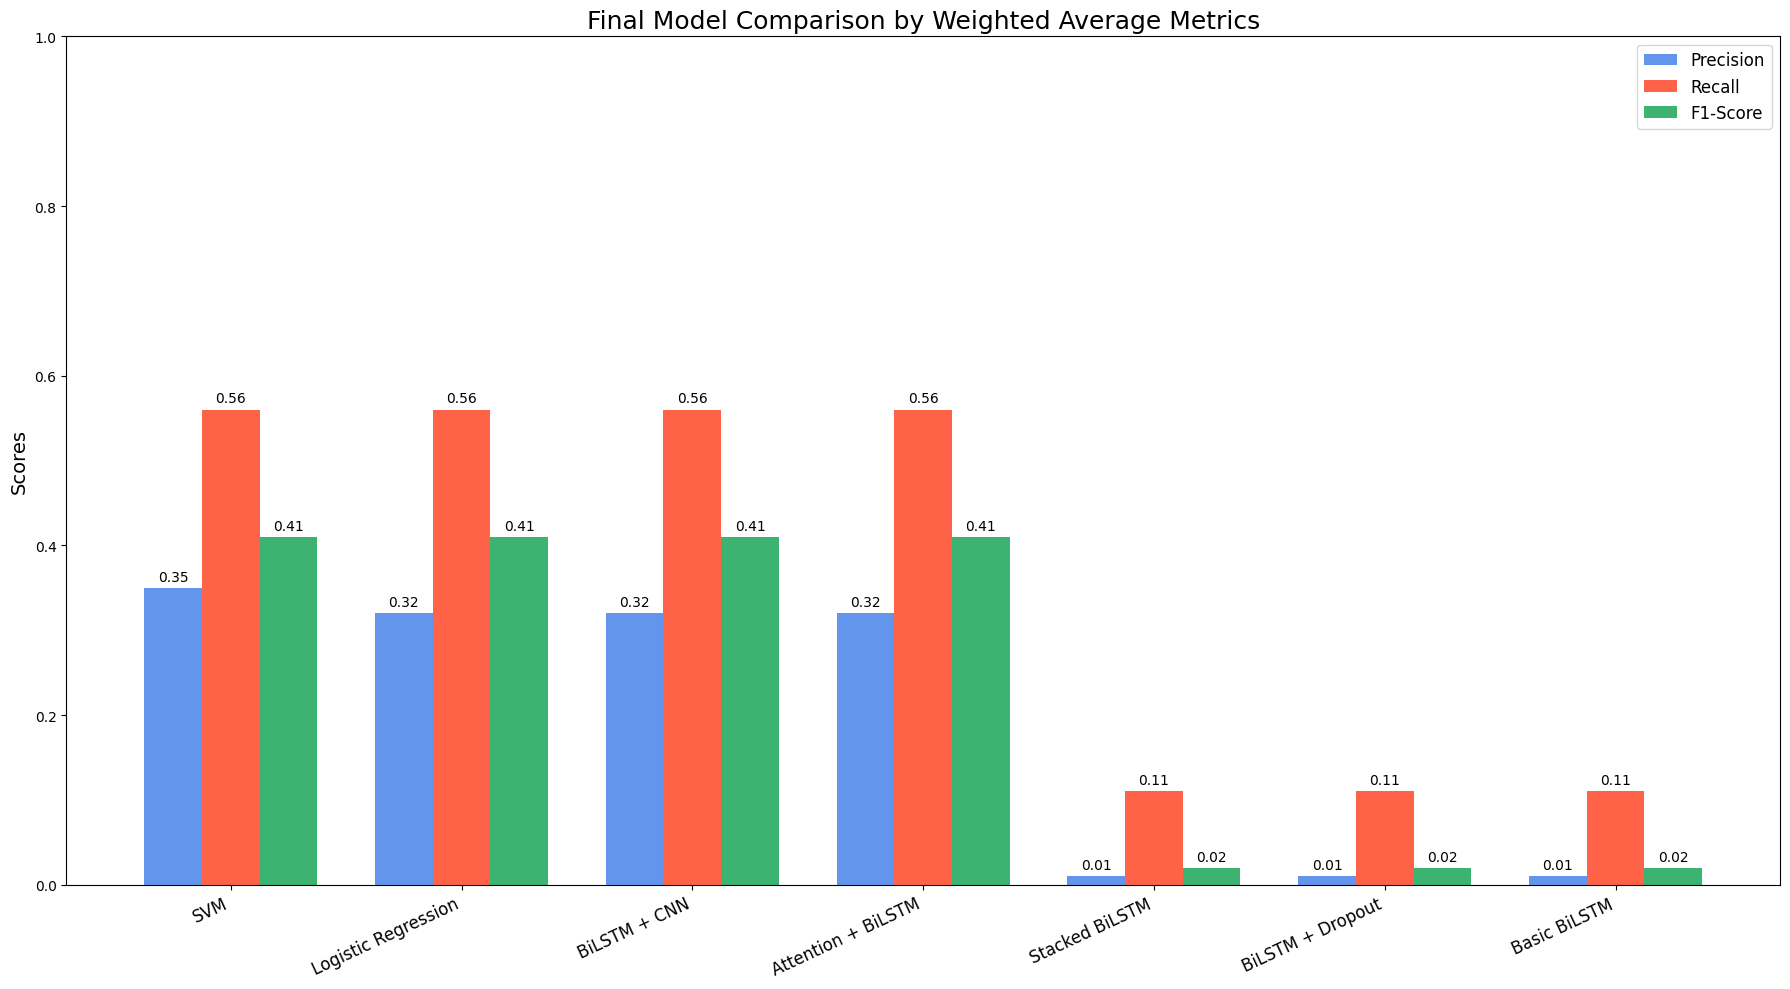

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# ===================================================================
# 1. PARSE THE CLASSIFICATION REPORTS PROVIDED BY THE USER
# ===================================================================

# Paste the full text of the reports here
reports_text = """
Training complete.
\\n--- Classification Report for SVM ---
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.20      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.15      0.20      0.14      8804
weighted avg       0.35      0.56      0.41      8804

\\n--- Classification Report for Logistic Regression ---
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for BiLSTM + CNN ---
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for Attention + BiLSTM ---
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\nClassification Report for Stacked_BiLSTM :
                      precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

    accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

nClassification Report for BiLSTM with Dropout:
                      precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

    accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

\\nClassification Report for BiLSTM (model_1):
                      precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

    accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402
"""

# Define model names in the order they appear
model_names = [
    "SVM",
    "Logistic Regression",
    "BiLSTM + CNN",
    "Attention + BiLSTM",
    "Stacked BiLSTM",
    "BiLSTM + Dropout",
    "Basic BiLSTM"
]

# Use regex to find all "weighted avg" lines and extract the scores
pattern = re.compile(r"weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
matches = pattern.findall(reports_text)

# Structure the extracted data
results_data = []
for i, match in enumerate(matches):
    results_data.append({
        "Model": model_names[i],
        "Precision": float(match[0]),
        "Recall": float(match[1]),
        "F1-Score": float(match[2])
    })

# ===================================================================
# 2. CREATE AND SAVE THE BAR GRAPH
# ===================================================================
print("Generating the final comparison graph...")
df_results = pd.DataFrame(results_data)

x = np.arange(len(df_results["Model"]))
width = 0.25

fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(x - width, df_results['Precision'], width, label='Precision', color='cornflowerblue')
rects2 = ax.bar(x, df_results['Recall'], width, label='Recall', color='tomato')
rects3 = ax.bar(x + width, df_results['F1-Score'], width, label='F1-Score', color='mediumseagreen')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Final Model Comparison by Weighted Average Metrics', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(df_results['Model'], rotation=25, ha="right", fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.0)

# Attach a text label above each bar, displaying its height
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
ax.bar_label(rects3, padding=3, fmt='%.2f')

fig.tight_layout()

# Save the final plot to a file
plt.savefig("final_model_comparison_graph.png")

print("Graph automatically generated from reports and saved as final_model_comparison_graph.png")

F1-Score comparison graph for all 7 models saved as f1_score_comparison_all_models.png


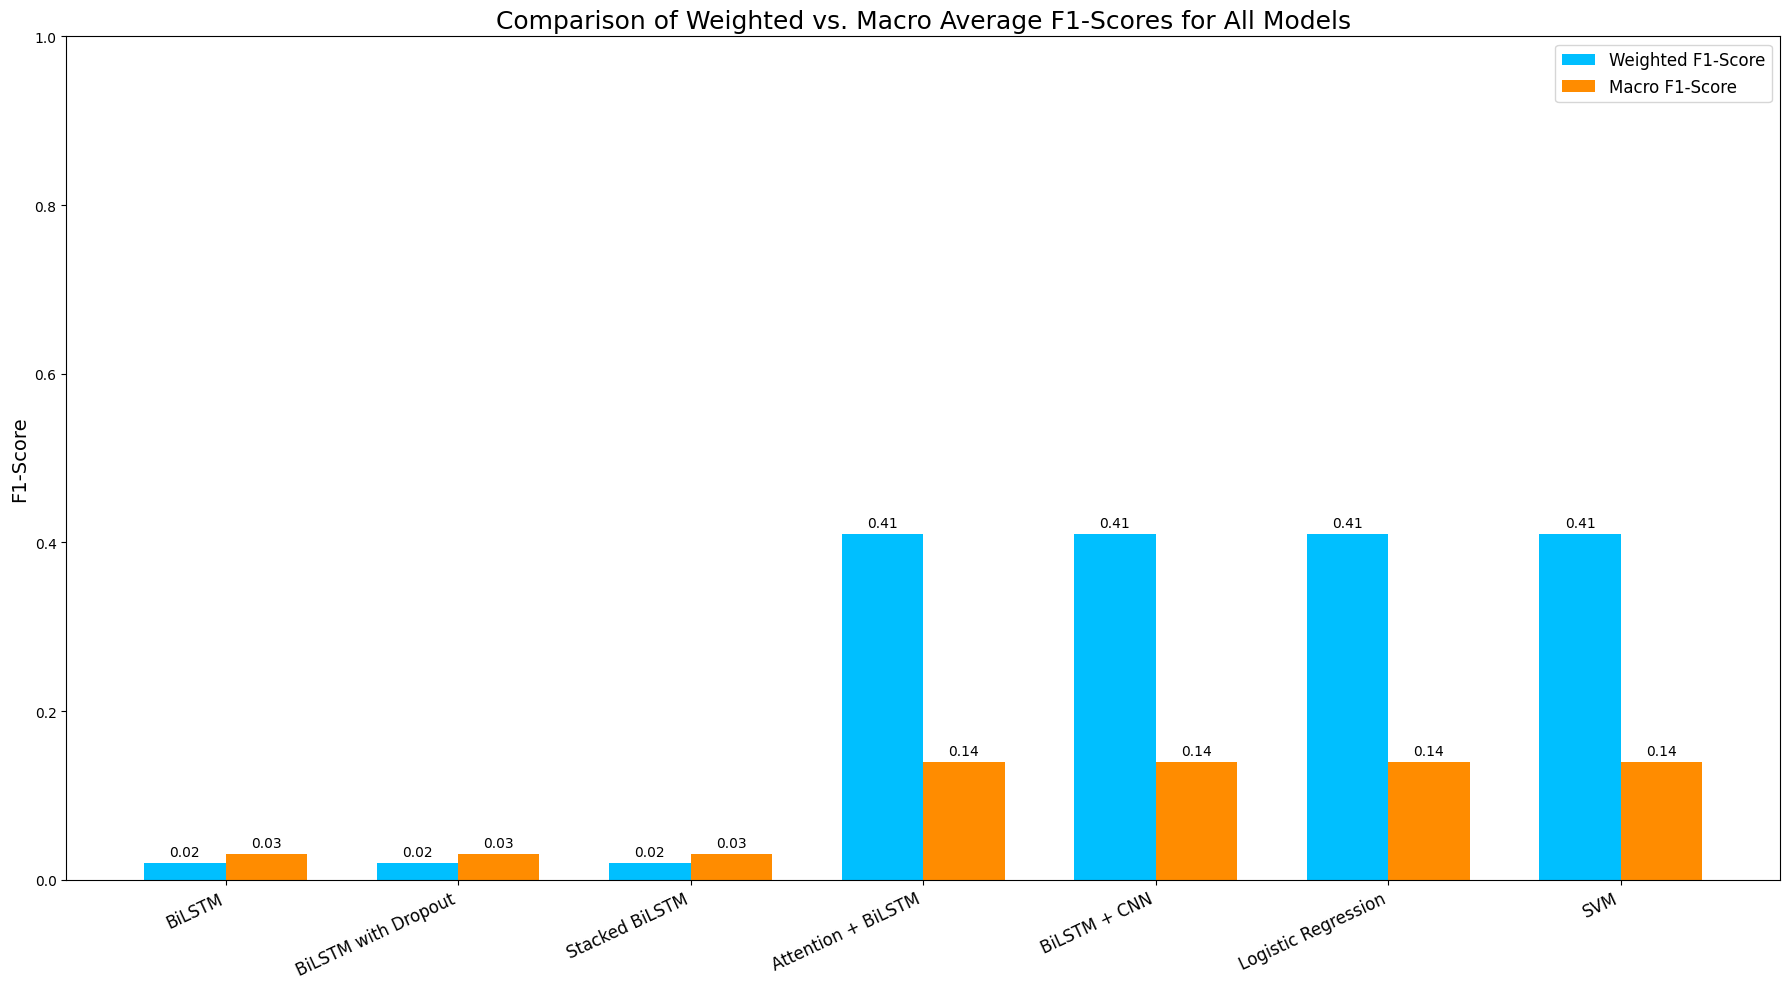

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# ===================================================================
# 1. PARSE ALL 7 CLASSIFICATION REPORTS
# ===================================================================

# The full text of the reports you provided
reports_text = """
Training complete.
\\n--- Classification Report for SVM ---
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.20      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.15      0.20      0.14      8804
weighted avg       0.35      0.56      0.41      8804

\\n--- Classification Report for Logistic Regression ---
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for BiLSTM + CNN ---
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for Attention + BiLSTM ---
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
                      precision    recall  f1-score   support

Mixed_feelings       0.00      0.00      0.00       986
      Negative       0.00      0.00      0.00      1046
      Positive       0.56      1.00      0.72      4974
     not-Tamil       0.00      0.00      0.00       417
 unknown_state       0.00      0.00      0.00      1381

    accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\nClassification Report for Stacked_BiLSTM :
                      precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

    accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

nClassification Report for BiLSTM with Dropout:
                      precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

    accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

\\nClassification Report for BiLSTM (model_1):
                      precision    recall  f1-score   support

Mixed_feelings       0.11      1.00      0.21       504
      Negative       0.00      0.00      0.00       496
      Positive       0.00      0.00      0.00      2482
     Positive        0.00      0.00      0.00         0
     not-Tamil       0.00      0.00      0.00       225
 unknown_state       0.00      0.00      0.00       695

    accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402
"""

f1_score_data = []

# Split the entire text block into individual reports
# The common delimiter is "Classification Report for"
report_chunks = re.split(r'Classification Report for', reports_text)

# Regex patterns to find the F1-scores and model names
weighted_pattern = re.compile(r"weighted avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)")
macro_pattern = re.compile(r"macro avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)")
name_pattern = re.compile(r'(.+?)(?:\s*:|\s*---)')

# Iterate through each chunk (skipping the first empty one)
for chunk in report_chunks[1:]:
    model_name_match = name_pattern.search(chunk)
    w_match = weighted_pattern.search(chunk)
    m_match = macro_pattern.search(chunk)

    if model_name_match and w_match and m_match:
        # Clean up the model name
        model_name = model_name_match.group(1).replace('(model_1)', '').replace('_', ' ').strip()

        f1_score_data.append({
            "Model": model_name,
            "Weighted F1-Score": float(w_match.group(1)),
            "Macro F1-Score": float(m_match.group(1))
        })

# Reverse the list so the models are in the order we trained them
f1_score_data.reverse()

# ===================================================================
# 2. CREATE AND SAVE THE F1-SCORE BAR GRAPH
# ===================================================================
df_f1 = pd.DataFrame(f1_score_data)

x = np.arange(len(df_f1["Model"]))
width = 0.35

fig, ax = plt.subplots(figsize=(18, 10))

# Create the bars for each F1-score type
rects1 = ax.bar(x - width/2, df_f1['Weighted F1-Score'], width, label='Weighted F1-Score', color='deepskyblue')
rects2 = ax.bar(x + width/2, df_f1['Macro F1-Score'], width, label='Macro F1-Score', color='darkorange')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('F1-Score', fontsize=14)
ax.set_title('Comparison of Weighted vs. Macro Average F1-Scores for All Models', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(df_f1['Model'], rotation=25, ha="right", fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.0)

# Attach a text label above each bar
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()

# Save the final plot to a file
plt.savefig("f1_score_comparison_all_models.png")

print("F1-Score comparison graph for all 7 models saved as f1_score_comparison_all_models.png")

F1-Score comparison graph for all 11 models saved as final_11_model_comparison_graph.png


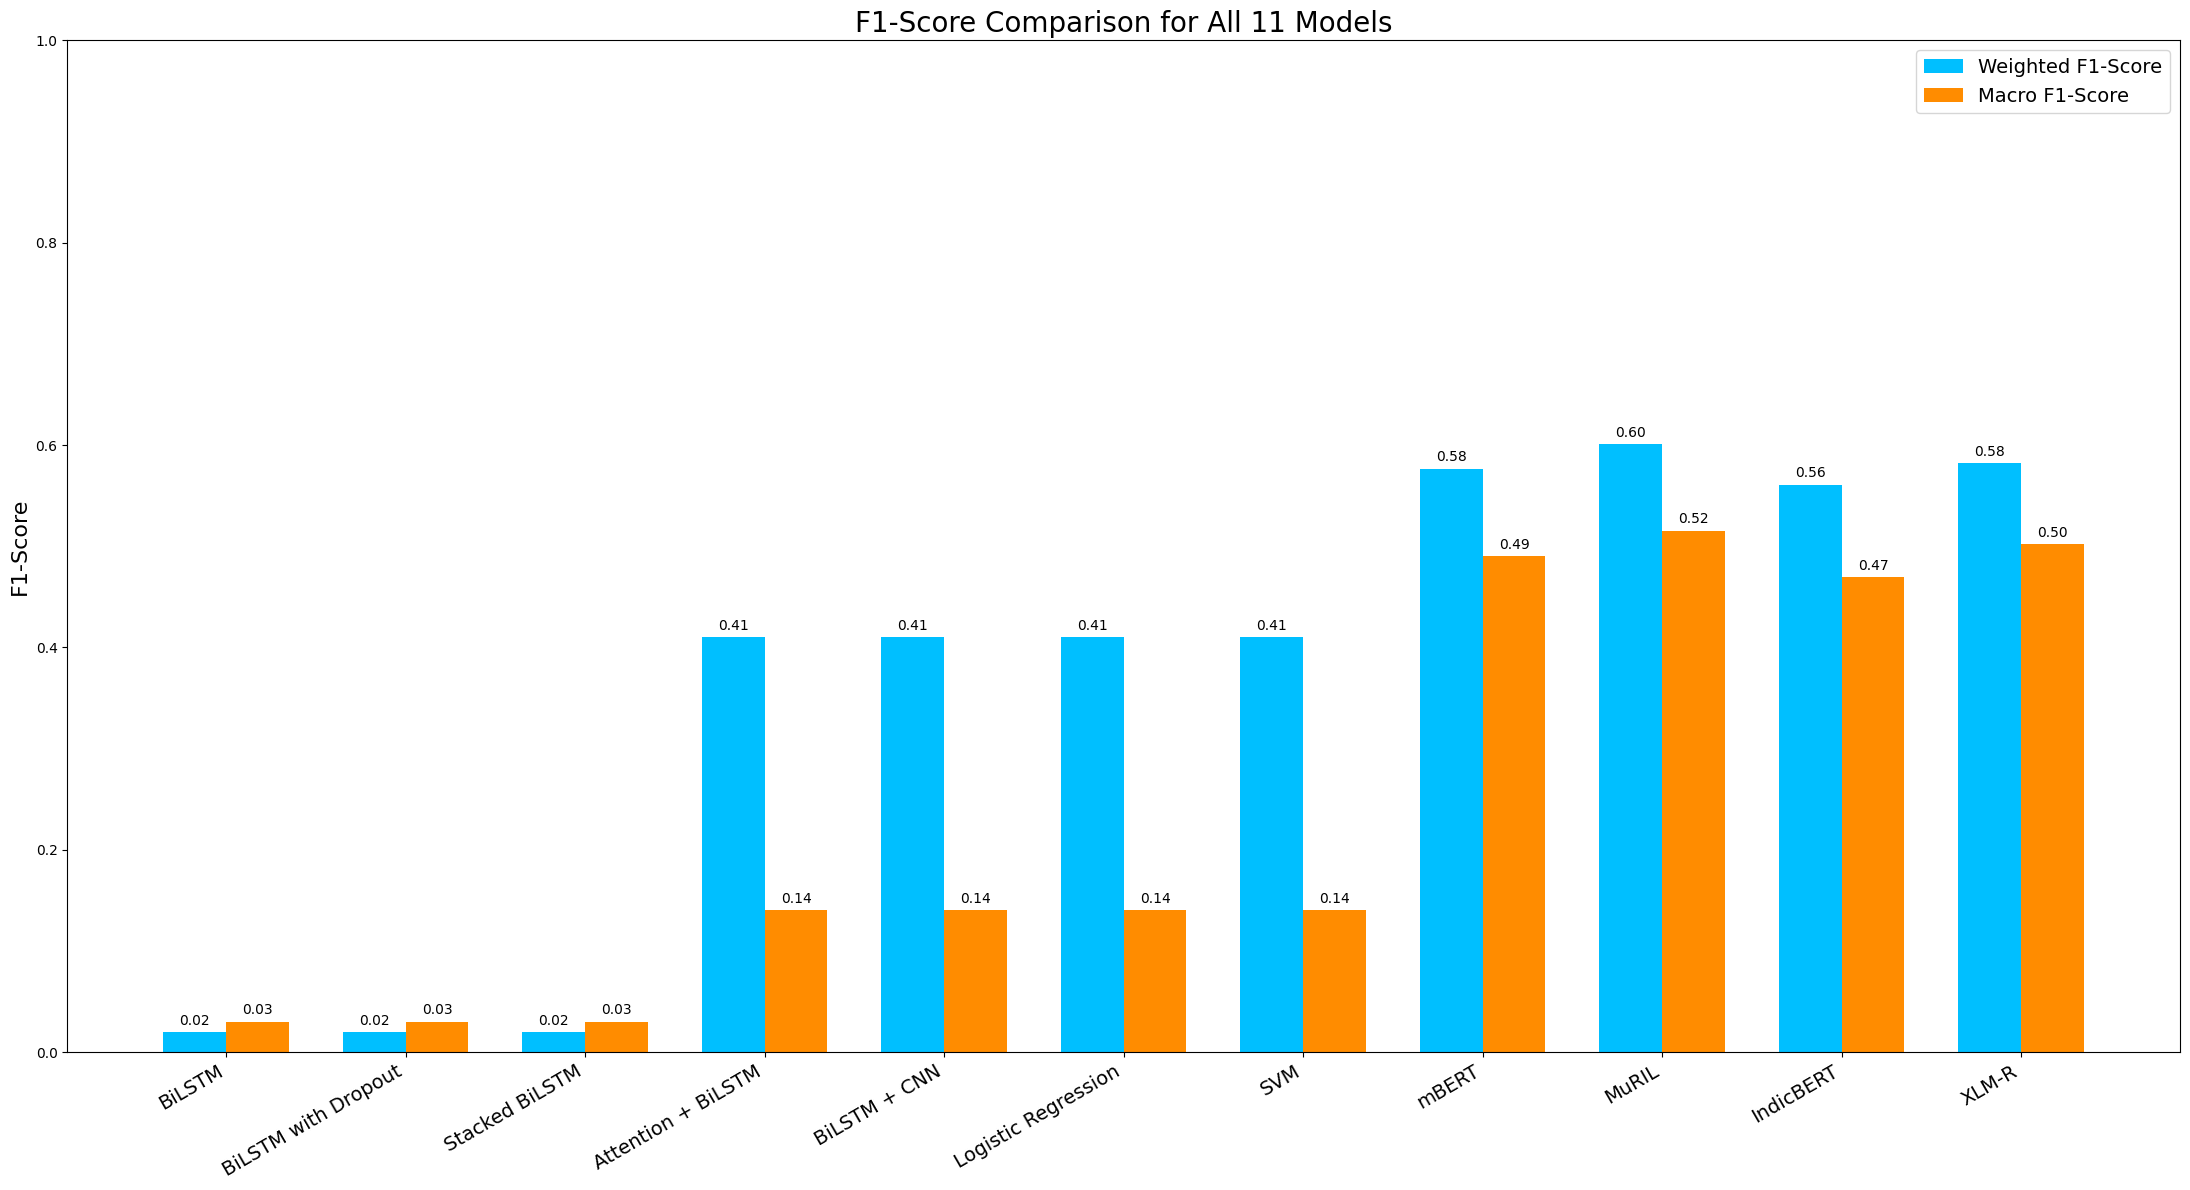

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# ===================================================================
# 1. PARSE ALL 11 CLASSIFICATION REPORTS
# ===================================================================

# The full text of all 11 reports
reports_text = """
\\n--- Classification Report for SVM ---
                      precision    recall  f1-score   support
   macro avg       0.15      0.20      0.14      8804
weighted avg       0.35      0.56      0.41      8804

\\n--- Classification Report for Logistic Regression ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for BiLSTM + CNN ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for Attention + BiLSTM ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\nClassification Report for Stacked_BiLSTM :
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

nClassification Report for BiLSTM with Dropout:
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

\\nClassification Report for BiLSTM (model_1):
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

Classification report for mBERT:
                      precision    recall  f1-score   support
   macro avg       0.4756    0.5331    0.4906    8804
weighted avg       0.6362    0.5511    0.5767    8804

Classification report for MuRIL:
                      precision    recall  f1-score   support
   macro avg       0.4992    0.5487    0.5154    8804
weighted avg       0.6411    0.5806    0.6007    8804

Classification report for IndicBERT:
                      precision    recall  f1-score   support
   macro avg       0.4528    0.5130    0.4691    8804
weighted avg       0.6166    0.5365    0.5609    8804

Classification report for XLM-R:
                      precision    recall  f1-score   support
   macro avg       0.4864    0.5455    0.5023    8804
weighted avg       0.6435    0.5569    0.5821    8804
"""

f1_score_data = []

# Split the entire text block into individual reports
report_chunks = re.split(r'Classification Report for|Classification report for', reports_text)

# CORRECTED Regex patterns to find only the F1-score
weighted_pattern = re.compile(r"weighted avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)")
macro_pattern = re.compile(r"macro avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)")
name_pattern = re.compile(r'(.+?)(?:\s*:|\s*---)')

for chunk in report_chunks[1:]: # Skip the first empty chunk
    model_name_match = name_pattern.search(chunk)
    w_match = weighted_pattern.search(chunk)
    m_match = macro_pattern.search(chunk)

    if model_name_match and w_match and m_match:
        model_name = model_name_match.group(1).replace('(model_1)', '').replace('_', ' ').strip()

        f1_score_data.append({
            "Model": model_name,
            # CORRECTED: Use group(1) for both as it's the first (and only) captured group
            "Weighted F1-Score": float(w_match.group(1)),
            "Macro F1-Score": float(m_match.group(1))
        })

# Reorder the data to match the intended sequence
original_order = [
    "BiLSTM", "BiLSTM with Dropout", "Stacked BiLSTM", "Attention + BiLSTM",
    "BiLSTM + CNN", "Logistic Regression", "SVM", "mBERT", "MuRIL",
    "IndicBERT", "XLM-R"
]
df_f1 = pd.DataFrame(f1_score_data).set_index('Model').reindex(original_order).reset_index()

# ===================================================================
# 2. CREATE AND SAVE THE FINAL BAR GRAPH
# ===================================================================
x = np.arange(len(df_f1["Model"]))
width = 0.35

fig, ax = plt.subplots(figsize=(22, 12))

# Create the bars
rects1 = ax.bar(x - width/2, df_f1['Weighted F1-Score'], width, label='Weighted F1-Score', color='deepskyblue')
rects2 = ax.bar(x + width/2, df_f1['Macro F1-Score'], width, label='Macro F1-Score', color='darkorange')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_title('F1-Score Comparison for All 11 Models', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(df_f1['Model'], rotation=30, ha="right", fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim(0, 1.0)

# Attach a text label above each bar
ax.bar_label(rects1, padding=3, fmt='%.2f', fontsize=10)
ax.bar_label(rects2, padding=3, fmt='%.2f', fontsize=10)

fig.tight_layout()

# Save the final plot to a file
plt.savefig("final_11_model_comparison_graph.png")

print("F1-Score comparison graph for all 11 models saved as final_11_model_comparison_graph.png")

Heatmap saved as f1_heatmap.png


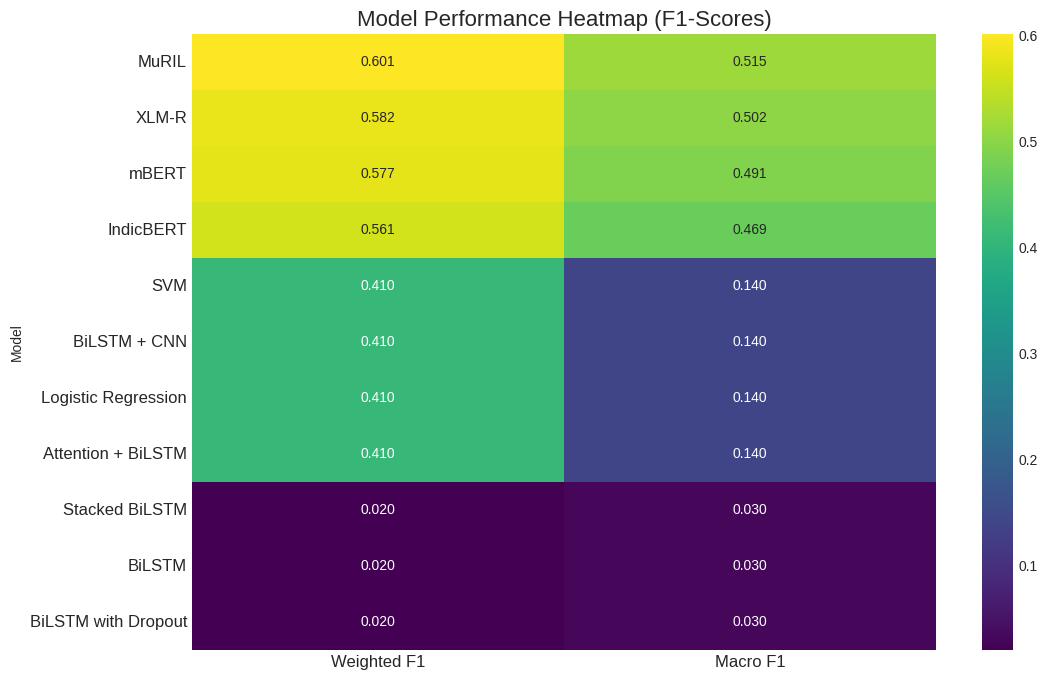

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

# ===================================================================
# 1. PARSE ALL 11 CLASSIFICATION REPORTS
# ===================================================================

# The full text of all 11 reports
reports_text = """
\\n--- Classification Report for SVM ---
                      precision    recall  f1-score   support
   macro avg       0.15      0.20      0.14      8804
weighted avg       0.35      0.56      0.41      8804

\\n--- Classification Report for Logistic Regression ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for BiLSTM + CNN ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for Attention + BiLSTM ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\nClassification Report for Stacked_BiLSTM :
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

nClassification Report for BiLSTM with Dropout:
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

\\nClassification Report for BiLSTM (model_1):
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

Classification report for mBERT:
                      precision    recall  f1-score   support
   macro avg       0.4756    0.5331    0.4906    8804
weighted avg       0.6362    0.5511    0.5767    8804

Classification report for MuRIL:
                      precision    recall  f1-score   support
   macro avg       0.4992    0.5487    0.5154    8804
weighted avg       0.6411    0.5806    0.6007    8804

Classification report for IndicBERT:
                      precision    recall  f1-score   support
   macro avg       0.4528    0.5130    0.4691    8804
weighted avg       0.6166    0.5365    0.5609    8804

Classification report for XLM-R:
                      precision    recall  f1-score   support
   macro avg       0.4864    0.5455    0.5023    8804
weighted avg       0.6435    0.5569    0.5821    8804
"""

report_chunks = re.split(r'Classification Report for|Classification report for', reports_text)
weighted_pattern = re.compile(r"weighted avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)")
macro_pattern = re.compile(r"macro avg\s+[\d.]+\s+[\d.]+\s+([\d.]+)")
name_pattern = re.compile(r'(.+?)(?:\s*:|\s*---)')

f1_score_data = []
for chunk in report_chunks[1:]:
    model_name_match = name_pattern.search(chunk)
    w_match = weighted_pattern.search(chunk)
    m_match = macro_pattern.search(chunk)
    if model_name_match and w_match and m_match:
        model_name = model_name_match.group(1).replace('(model_1)', '').replace('_', ' ').strip()
        f1_score_data.append({
            "Model": model_name,
            "Weighted F1": float(w_match.group(1)),
            "Macro F1": float(m_match.group(1))
        })

original_order = [
    "BiLSTM", "BiLSTM with Dropout", "Stacked BiLSTM", "Attention + BiLSTM",
    "BiLSTM + CNN", "Logistic Regression", "SVM", "mBERT", "MuRIL",
    "IndicBERT", "XLM-R"
]
df_f1 = pd.DataFrame(f1_score_data).set_index('Model').reindex(original_order).reset_index()
df_sorted = df_f1.sort_values('Weighted F1', ascending=False)

# ===================================================================
# 2. GENERATE THE HEATMAP
# ===================================================================
plt.figure(figsize=(12, 8))
sns.heatmap(df_sorted.set_index('Model'), annot=True, cmap='viridis', fmt=".3f")
plt.title('Model Performance Heatmap (F1-Scores)', fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('f1_heatmap.png', bbox_inches='tight')

print("Heatmap saved as f1_heatmap.png")

Generating Precision comparison graph...
Precision bar graph saved as precision_comparison_graph.png

Generating Recall comparison graph...
Recall bar graph saved as recall_comparison_graph.png


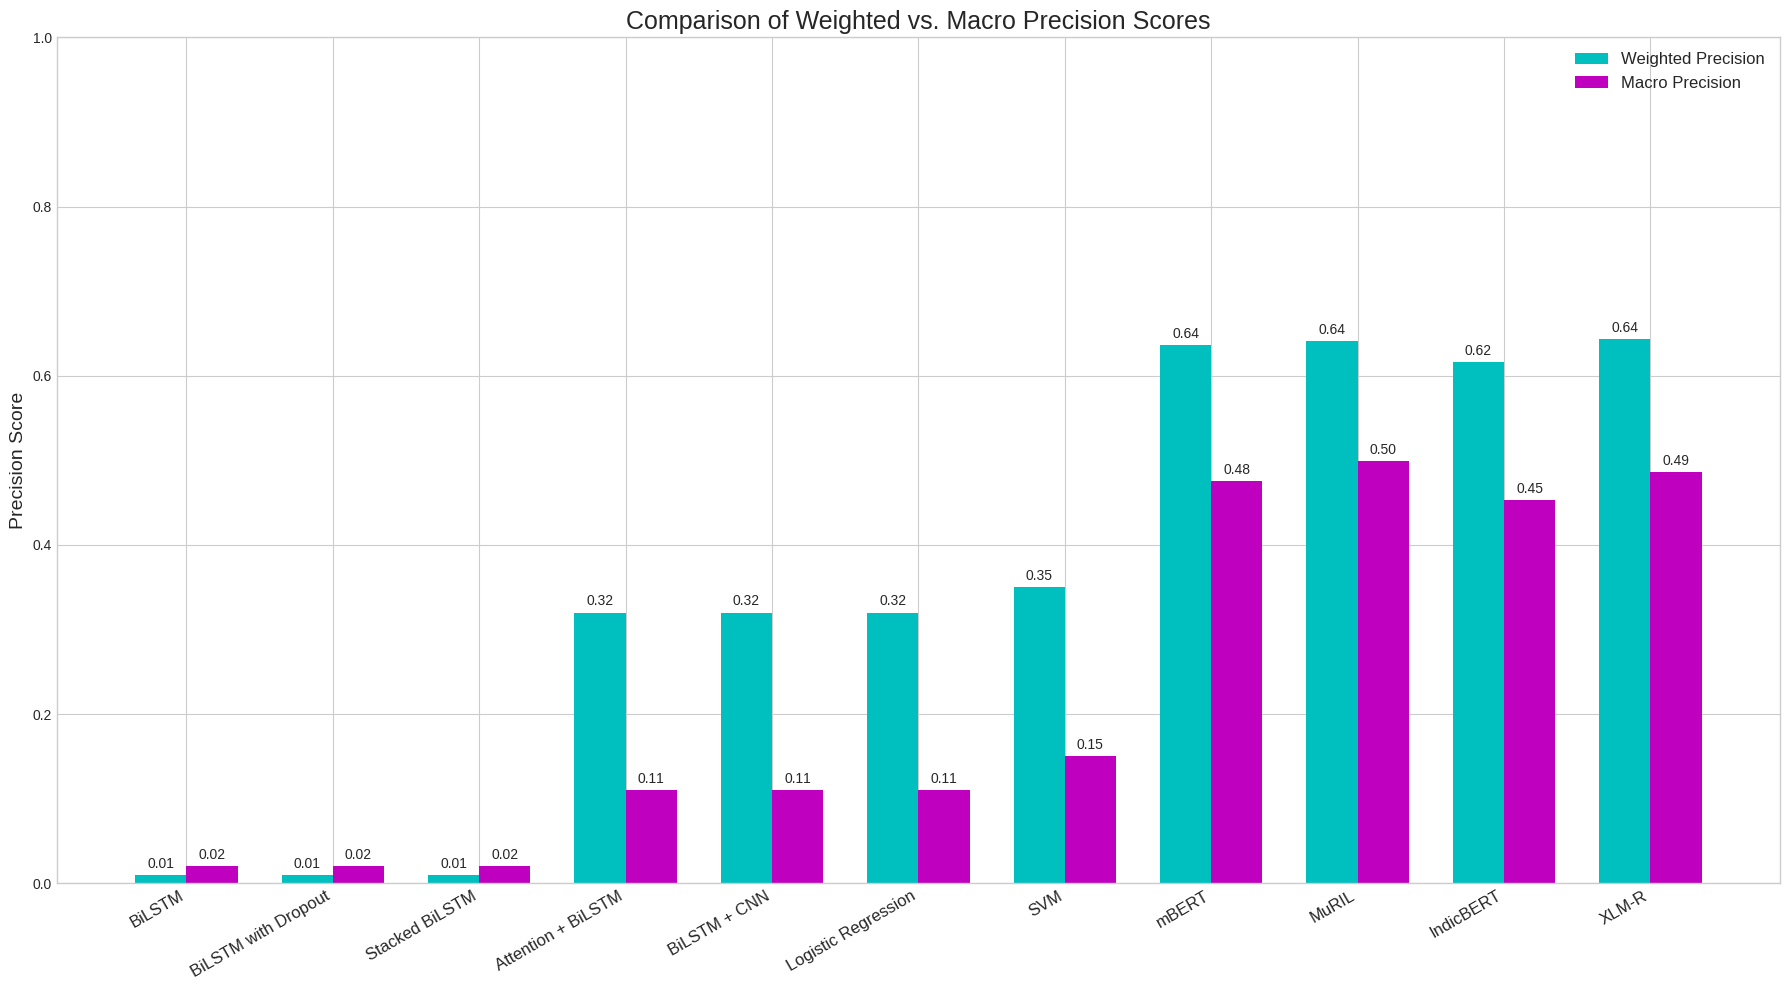

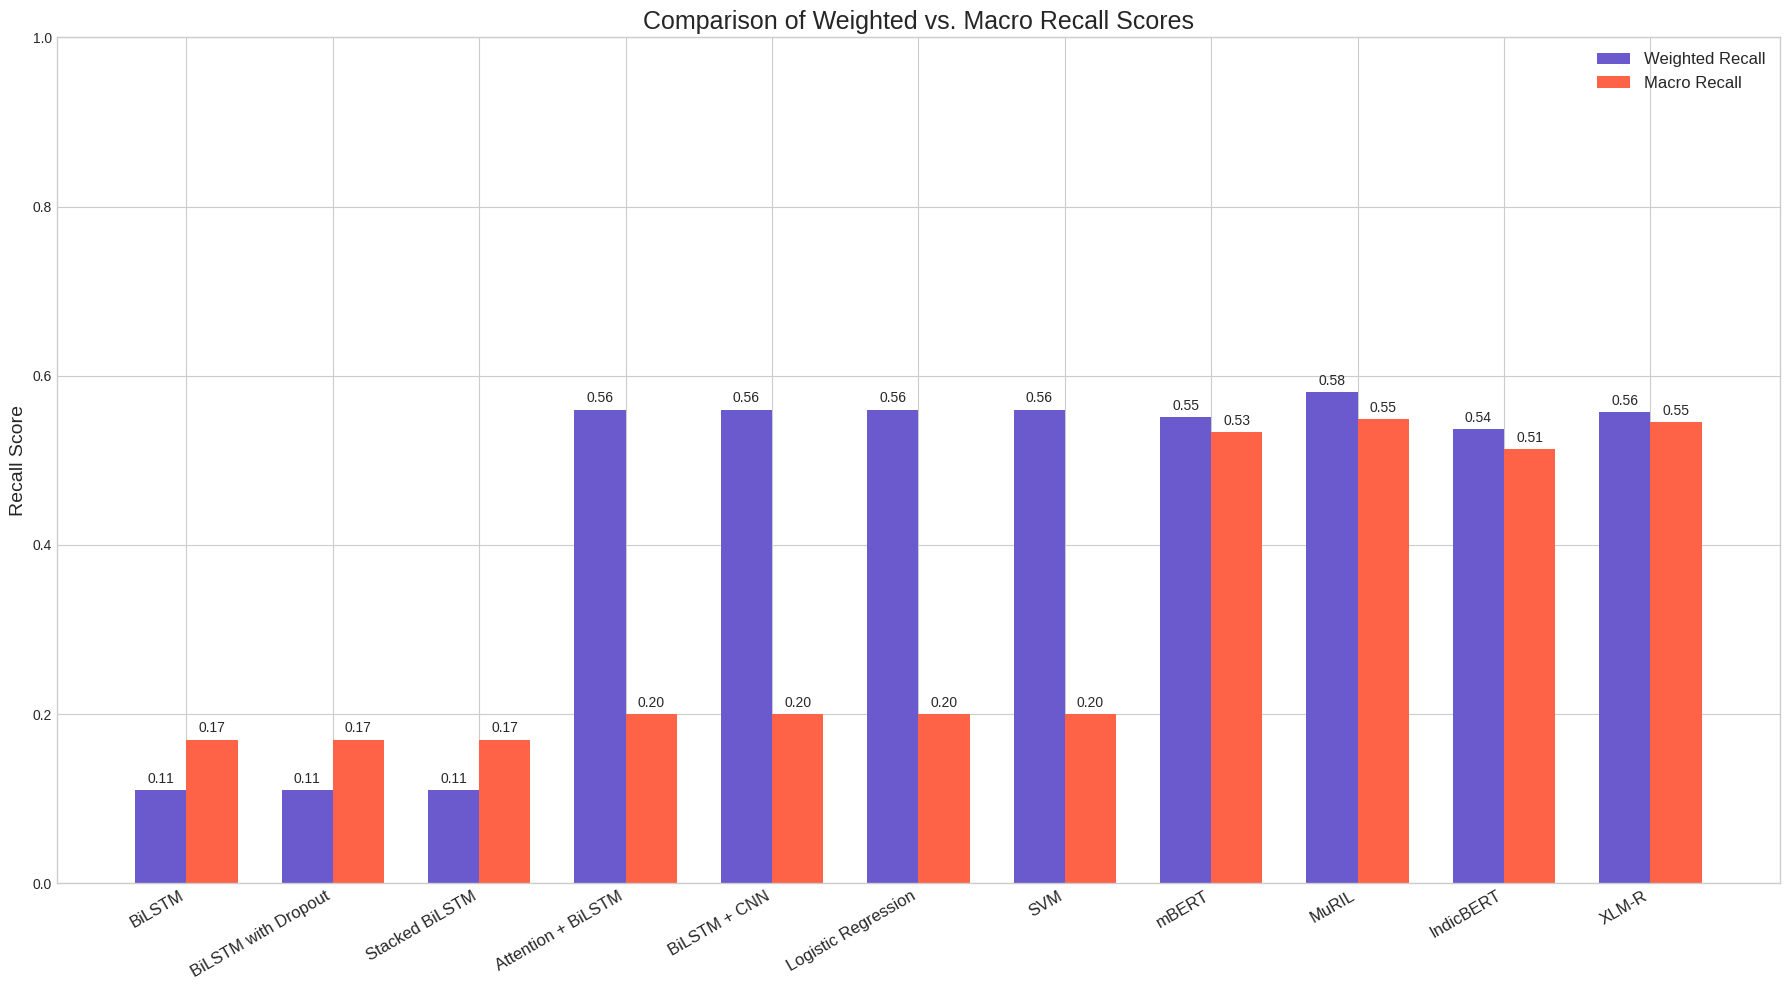

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

# ===================================================================
# 1. PARSE ALL 11 CLASSIFICATION REPORTS FOR ALL METRICS
# ===================================================================

# The full text of all 11 reports
reports_text = """
\\n--- Classification Report for SVM ---
                      precision    recall  f1-score   support
   macro avg       0.15      0.20      0.14      8804
weighted avg       0.35      0.56      0.41      8804

\\n--- Classification Report for Logistic Regression ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for BiLSTM + CNN ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for Attention + BiLSTM ---
                      precision    recall  f1-score   support
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\nClassification Report for Stacked_BiLSTM :
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

nClassification Report for BiLSTM with Dropout:
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

\\nClassification Report for BiLSTM (model_1):
                      precision    recall  f1-score   support
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

Classification report for mBERT:
                      precision    recall  f1-score   support
   macro avg       0.4756    0.5331    0.4906    8804
weighted avg       0.6362    0.5511    0.5767    8804

Classification report for MuRIL:
                      precision    recall  f1-score   support
   macro avg       0.4992    0.5487    0.5154    8804
weighted avg       0.6411    0.5806    0.6007    8804

Classification report for IndicBERT:
                      precision    recall  f1-score   support
   macro avg       0.4528    0.5130    0.4691    8804
weighted avg       0.6166    0.5365    0.5609    8804

Classification report for XLM-R:
                      precision    recall  f1-score   support
   macro avg       0.4864    0.5455    0.5023    8804
weighted avg       0.6435    0.5569    0.5821    8804
"""

report_chunks = re.split(r'Classification Report for|Classification report for', reports_text)
# Regex patterns to capture all three scores from the lines
weighted_pattern = re.compile(r"weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
macro_pattern = re.compile(r"macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)")
name_pattern = re.compile(r'(.+?)(?:\s*:|\s*---)')

all_metrics_data = []
for chunk in report_chunks[1:]:
    model_name_match = name_pattern.search(chunk)
    w_match = weighted_pattern.search(chunk)
    m_match = macro_pattern.search(chunk)
    if model_name_match and w_match and m_match:
        model_name = model_name_match.group(1).replace('(model_1)', '').replace('_', ' ').strip()
        all_metrics_data.append({
            "Model": model_name,
            "Weighted Precision": float(w_match.group(1)),
            "Weighted Recall": float(w_match.group(2)),
            "Macro Precision": float(m_match.group(1)),
            "Macro Recall": float(m_match.group(2)),
        })

original_order = [
    "BiLSTM", "BiLSTM with Dropout", "Stacked BiLSTM", "Attention + BiLSTM",
    "BiLSTM + CNN", "Logistic Regression", "SVM", "mBERT", "MuRIL",
    "IndicBERT", "XLM-R"
]
df_metrics = pd.DataFrame(all_metrics_data).set_index('Model').reindex(original_order).reset_index()

# ===================================================================
# 2. GENERATE AND SAVE THE VISUALIZATIONS
# ===================================================================

# --- Chart 1: Precision Bar Graph ---
print("Generating Precision comparison graph...")
x = np.arange(len(df_metrics["Model"]))
width = 0.35
fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(x - width/2, df_metrics['Weighted Precision'], width, label='Weighted Precision', color='c')
rects2 = ax.bar(x + width/2, df_metrics['Macro Precision'], width, label='Macro Precision', color='m')
ax.set_ylabel('Precision Score', fontsize=14)
ax.set_title('Comparison of Weighted vs. Macro Precision Scores', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Model'], rotation=30, ha="right", fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.0)
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
fig.tight_layout()
plt.savefig("precision_comparison_graph.png")
print("Precision bar graph saved as precision_comparison_graph.png")


# --- Chart 2: Recall Bar Graph ---
print("\nGenerating Recall comparison graph...")
fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(x - width/2, df_metrics['Weighted Recall'], width, label='Weighted Recall', color='slateblue')
rects2 = ax.bar(x + width/2, df_metrics['Macro Recall'], width, label='Macro Recall', color='tomato')
ax.set_ylabel('Recall Score', fontsize=14)
ax.set_title('Comparison of Weighted vs. Macro Recall Scores', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Model'], rotation=30, ha="right", fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 1.0)
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')
fig.tight_layout()
plt.savefig("recall_comparison_graph.png")
print("Recall bar graph saved as recall_comparison_graph.png")

Generating Accuracy comparison graph...


/tmp/ipython-input-3316813244.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accuracy', y='Model', data=df_accuracy_sorted, palette='viridis', orient='h')


Accuracy bar graph saved as accuracy_comparison_graph.png


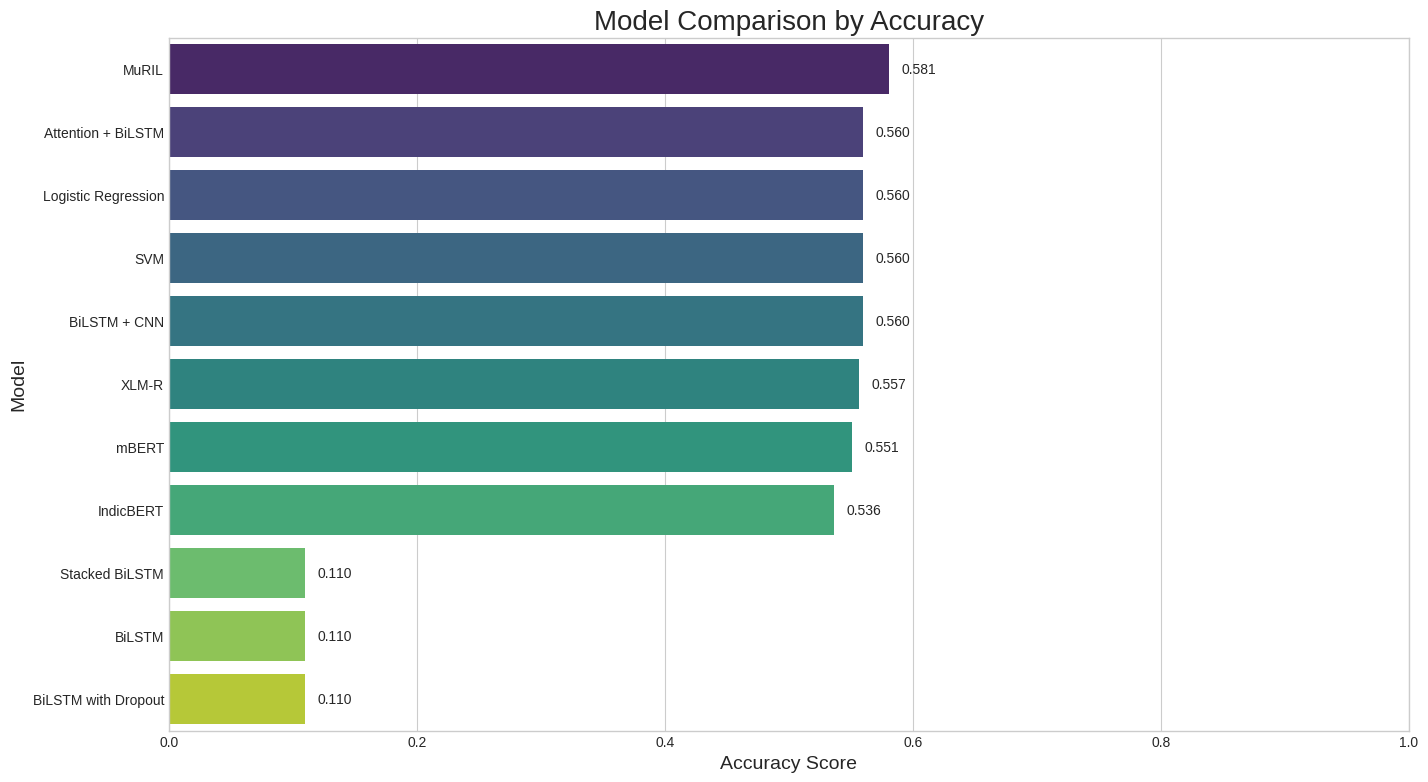

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

# ===================================================================
# 1. PARSE ALL 11 CLASSIFICATION REPORTS FOR ACCURACY
# ===================================================================

# The full text of all 11 reports
reports_text = """
\\n--- Classification Report for SVM ---
                      precision    recall  f1-score   support
   accuracy                           0.56      8804
   macro avg       0.15      0.20      0.14      8804
weighted avg       0.35      0.56      0.41      8804

\\n--- Classification Report for Logistic Regression ---
                      precision    recall  f1-score   support
   accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for BiLSTM + CNN ---
                      precision    recall  f1-score   support
   accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\n--- Classification Report for Attention + BiLSTM ---
                      precision    recall  f1-score   support
   accuracy                           0.56      8804
   macro avg       0.11      0.20      0.14      8804
weighted avg       0.32      0.56      0.41      8804

\\nClassification Report for Stacked_BiLSTM :
                      precision    recall  f1-score   support
   accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

nClassification Report for BiLSTM with Dropout:
                      precision    recall  f1-score   support
   accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

\\nClassification Report for BiLSTM (model_1):
                      precision    recall  f1-score   support
   accuracy                           0.11      4402
   macro avg       0.02      0.17      0.03      4402
weighted avg       0.01      0.11      0.02      4402

Classification report for mBERT:
                      precision    recall  f1-score   support
   accuracy                           0.5511    8804
   macro avg       0.4756    0.5331    0.4906    8804
weighted avg       0.6362    0.5511    0.5767    8804

Classification report for MuRIL:
                      precision    recall  f1-score   support
   accuracy                           0.5806    8804
   macro avg       0.4992    0.5487    0.5154    8804
weighted avg       0.6411    0.5806    0.6007    8804

Classification report for IndicBERT:
                      precision    recall  f1-score   support
   accuracy                           0.5365    8804
   macro avg       0.4528    0.5130    0.4691    8804
weighted avg       0.6166    0.5365    0.5609    8804

Classification report for XLM-R:
                      precision    recall  f1-score   support
   accuracy                           0.5569    8804
   macro avg       0.4864    0.5455    0.5023    8804
weighted avg       0.6435    0.5569    0.5821    8804
"""

report_chunks = re.split(r'Classification Report for|Classification report for', reports_text)
# Regex patterns to capture accuracy and model names
accuracy_pattern = re.compile(r"accuracy\s+([\d.]+)")
name_pattern = re.compile(r'(.+?)(?:\s*:|\s*---)')

accuracy_data = []
for chunk in report_chunks[1:]:
    model_name_match = name_pattern.search(chunk)
    acc_match = accuracy_pattern.search(chunk)
    if model_name_match and acc_match:
        model_name = model_name_match.group(1).replace('(model_1)', '').replace('_', ' ').strip()
        accuracy_data.append({
            "Model": model_name,
            "Accuracy": float(acc_match.group(1)),
        })

original_order = [
    "BiLSTM", "BiLSTM with Dropout", "Stacked BiLSTM", "Attention + BiLSTM",
    "BiLSTM + CNN", "Logistic Regression", "SVM", "mBERT", "MuRIL",
    "IndicBERT", "XLM-R"
]
df_accuracy = pd.DataFrame(accuracy_data).set_index('Model').reindex(original_order).reset_index()

# Sort by accuracy for better visualization
df_accuracy_sorted = df_accuracy.sort_values('Accuracy', ascending=False)

# ===================================================================
# 2. GENERATE AND SAVE THE ACCURACY BAR GRAPH
# ===================================================================
print("Generating Accuracy comparison graph...")

plt.figure(figsize=(16, 9))
# Create the bar plot
ax = sns.barplot(x='Accuracy', y='Model', data=df_accuracy_sorted, palette='viridis', orient='h')

# Add labels and title
ax.set_title('Model Comparison by Accuracy', fontsize=20)
ax.set_xlabel('Accuracy Score', fontsize=14)
ax.set_ylabel('Model', fontsize=14)
ax.set_xlim(0, 1.0)

# Add the accuracy values on the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01, p.get_y() + p.get_height()/2.,
            f'{width:.3f}',
            va='center')

# Save the plot to a file
plt.savefig("accuracy_comparison_graph.png", bbox_inches='tight')
print("Accuracy bar graph saved as accuracy_comparison_graph.png")